In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

##### import dataset

In [6]:
data = pd.read_csv("/Users/cestdrama/Desktop/yelp_new.csv")
X = X.drop(['stars'], axis=1)
y=data['stars']

In [7]:
X.shape

(1048575, 4)

##### Scaler

In [ ]:
#Scaler
scaler=StandardScaler()
X = scaler.fit_transform(X)
y = np.array(y).astype(int)
print(y)

##### label binarize

In [15]:
from sklearn.preprocessing import label_binarize
y = label_binarize(y, classes=[1, 2, 3,4,5])
print(y)

[[0 0 0 1 0]
 [0 0 1 0 0]
 [0 0 1 0 0]
 ...
 [0 0 0 1 0]
 [0 0 0 1 0]
 [1 0 0 0 0]]


##### class number 

In [17]:
# class number 
n_classes = y.shape[1]
print(n_classes)

5


#####  shuffle and split training and test sets

In [19]:
# shuffle and split training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=33)

##### train model by random forest

In [22]:
from sklearn.ensemble import RandomForestClassifier
ranmodel = RandomForestClassifier(
    n_estimators=100,
    max_features = "auto", 
    min_samples_leaf = 50,
    oob_score = True,
    n_jobs = -1
)
ranmodel = ranmodel.fit(X_train, y_train)

##### prediction result

In [23]:
y_score=ranmodel.predict(X_test)

##### calculate ROC of each class

In [25]:
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

##### Compute micro-average ROC curve and ROC areaa

In [38]:
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
print(roc_auc)

{0: 0.8256454303767119, 1: 0.6801510037113183, 2: 0.741323641879746, 3: 0.7506871081610021, 4: 0.8414671175438133, 'micro': 0.7827205657958984}


##### Plot all ROC curves

<Figure size 432x288 with 0 Axes>

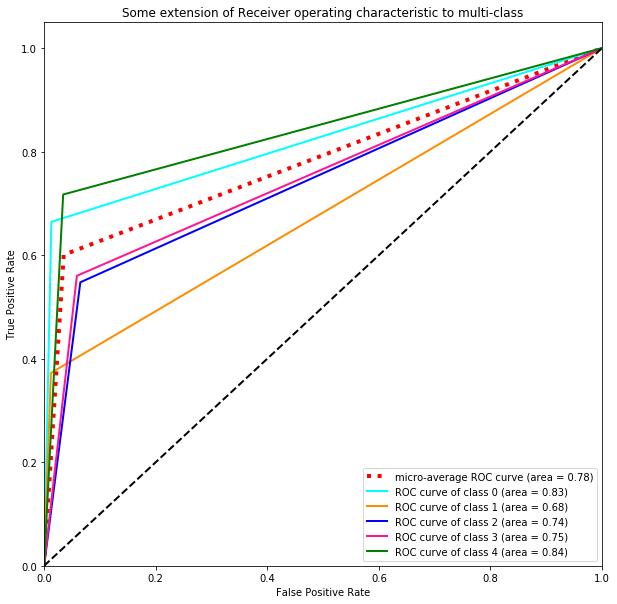

In [37]:
from itertools import cycle
lw=2
plt.figure()
plt.figure(figsize=(10,10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='red', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'blue','deeppink','green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()